# Time to build a model (in steps)

## 1- Standardize Our Data

In [2]:
# Import our libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import from sklearn.
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
df = pd.read_csv('updated df 05-20-2020.csv')

In [5]:
df.fillna(0, inplace=True)

In [6]:
df.shape

(414, 50)

### Should we use Polynomial Features? (Benefits?)

### No need to Train test split our data since we are clustering with K-means next

In [7]:
df.head(3)

,Player,Pos,Age,Team,Games,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Carl Landry,PF,32,PHI,36,12,15.8,3.9,6.9,0.556,0.2,0.4,0.462,3.7,6.6,0.561,0.568,1.9,2.5,0.736,1.4,2.7,4.1,0.9,0.3,0.3,0.6,1.9,9.8,2016,22.4,0.605,0.052,0.364,9.1,19.2,14.0,11.1,1.0,1.2,7.1,24.0,1.8,0.3,2.1,0.176,2.6,-1.4,1.2,0.5
1,O.J. Mayo,SG,28,MIL,41,24,26.6,2.9,7.8,0.371,1.3,4.0,0.321,1.6,3.9,0.421,0.452,0.8,1.0,0.775,0.3,2.2,2.6,2.9,1.2,0.2,1.8,3.1,7.8,2016,7.7,0.474,0.505,0.125,1.4,9.6,5.5,15.8,2.2,0.6,17.5,17.0,-0.7,0.6,-0.1,-0.005,-3.8,-0.2,-4.0,-0.6
2,Ray McCallum,PG,24,MEM,10,3,21.9,2.8,7.9,0.354,1.0,2.6,0.385,1.8,5.3,0.340,0.418,0.3,0.5,0.600,0.2,1.4,1.6,2.7,0.7,0.3,1.3,1.5,6.9,2016,9.1,0.449,0.288,0.103,1.9,9.3,5.6,18.5,1.3,1.2,13.6,16.8,-0.2,0.5,0.3,0.034,-2.6,-0.5,-3.1,-0.1


In [8]:
X = df.drop(columns=['Player', 'Pos', 'Team', 'Year'])

### Standardize our Data

In [9]:
ss = StandardScaler()

In [10]:
X_scaled = ss.fit_transform(X)

## Apply PCA

In [11]:
pca = PCA(random_state=42)

In [12]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [62]:
pca.components_

array([[-9.74757872e-03,  5.97852802e-01,  7.62318744e-01, ...,
         8.26079267e-03,  5.02817418e-02,  2.51781938e-02],
       [ 1.46173280e-02,  7.92724129e-01, -5.28541539e-01, ...,
         6.53530863e-04, -2.57934798e-02, -2.02993253e-02],
       [ 6.16944876e-02,  5.77007984e-02, -2.25353876e-01, ...,
        -1.54558390e-02,  7.07409538e-02,  3.84808274e-02],
       ...,
       [ 7.77659668e-05,  1.64562294e-04, -4.02480490e-05, ...,
         3.31025141e-03, -7.16440744e-03,  6.81997345e-03],
       [-1.66058424e-04,  9.31781078e-05,  2.52514149e-05, ...,
        -1.36255191e-02,  1.19940499e-03,  1.99207911e-03],
       [-2.73282656e-06,  2.67590754e-05, -4.53431405e-06, ...,
        -4.77235151e-03,  4.05899305e-03,  3.47851046e-04]])

In [13]:
Z_features = pca.transform(X)

In [15]:
pd.DataFrame(Z_features).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
count,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02
mean,-3.398248e-15,-1.287215e-16,9.954463e-16,1.716287e-16,-1.615455e-15,-1.403064e-15,4.644701e-16,-2.027364e-16,8.096047e-16,3.187466e-15,-2.953890e-16,-1.563430e-16,1.351576e-15,-1.016095e-15,-1.858417e-16,-1.413791e-15,-6.948280e-16,9.849877e-16,1.920096e-16,-3.989026e-16,-2.936459e-16,3.057136e-17,-2.788966e-17,-4.733197e-17,-3.176471e-16,-4.706380e-17,-1.038488e-16,8.299856e-17,2.458782e-16,7.199521e-17,3.560625e-16,-3.955505e-16,-1.853724e-16,6.905373e-17,1.168299e-16,-1.395698e-16,-9.101013e-18,-3.334189e-16,-3.090489e-16,-6.024183e-17,3.881507e-16,2.729885e-16,1.759864e-17,-1.179528e-17,1.893530e-17,3.466514e-17
std,3.422296e+01,1.717481e+01,1.040532e+01,9.724246e+00,6.707854e+00,4.543490e+00,3.773559e+00,3.472231e+00,2.702851e+00,2.406476e+00,1.698090e+00,1.634752e+00,1.416305e+00,1.068086e+00,9.541292e-01,9.478629e-01,7.007604e-01,5.980176e-01,5.076182e-01,4.473480e-01,3.844514e-01,3.195395e-01,3.142283e-01,2.609507e-01,2.086201e-01,1.785350e-01,1.622434e-01,1.328433e-01,1.042827e-01,8.792751e-02,8.419876e-02,8.012561e-02,7.525634e-02,5.361716e-02,4.326057e-02,3.977279e-02,2.976373e-02,2.770955e-02,2.689372e-02,2.573404e-02,2.436817e-02,2.346329e-02,2.188601e-02,8.832017e-03,8.000646e-03,3.128381e-03
min,-5.861085e+01,-2.820056e+01,-2.212072e+01,-2.409731e+01,-1.649843e+01,-1.455395e+01,-1.145572e+01,-1.074302e+01,-1.076118e+01,-1.072552e+01,-6.845482e+00,-6.888734e+00,-4.170488e+00,-3.584192e+00,-2.169061e+00,-2.990730e+00,-2.374373e+00,-2.646381e+00,-1.560617e+00,-1.458923e+00,-1.344473e+00,-1.286661e+00,-1.057344e+00,-1.182624e+00,-9.812157e-01,-6.699487e-01,-4.947840e-01,-5.328714e-01,-3.501154e-01,-2.745951e-01,-3.274588e-01,-2.693604e-01,-3.016042e-01,-1.935008e-01,-1.687927e-01,-1.418670e-01,-8.452734e-02,-7.570277e-02,-7.889705e-02,-6.841514e-02,-6.967061e-02,-6.740281e-02,-8.005533e-02,-2.914592e-02,-2.405452e-02,-1.396496e-02
25%,-2.596633e+01,-1.380741e+01,-7.560937e+00,-7.039721e+00,-4.478461e+00,-3.165070e+00,-2.287539e+00,-1.900157e+00,-1.597766e+00,-1.366919e+00,-1.019893e+00,-8.577143e-01,-9.012021e-01,-6.204759e-01,-6.982791e-01,-5.705511e-01,-4.590942e-01,-3.258680e-01,-3.353478e-01,-2.497579e-01,-2.137148e-01,-2.110705e-01,-1.947653e-01,-1.227592e-01,-1.040003e-01,-9.297845e-02,-9.812427e-02,-6.900821e-02,-5.593755e-02,-4.915973e-02,-4.607148e-02,-4.321428e-02,-3.562365e-02,-2.616289e-02,-2.341863e-02,-2.083612e-02,-1.815103e-02,-2.022198e-02,-1.493737e-02,-1.768407e-02,-1.739509e-02,-1.432301e-02,-1.242564e-02,-4.919432e-03,-5.092910e-03,-1.382871e-03
50%,-3.805386e+00,-4.558724e+00,-1.277156e+00,-1.509194e+00,-1.634626e-01,1.059162e-01,-9.926279e-02,7.740066e-02,1.440443e-01,1.061662e-01,-3.826310e-03,-9.921192e-03,-5.336780e-03,-1.576846e-02,-6.927011e-03,-6.449668e-02,-3.592629e-02,-1.496351e-03,-3.148891e-02,6.919566e-03,-2.747096e-03,3.542386e-03,1.517348e-02,-6.360647e-04,6.161564e-03,1.006841e-02,-8.570147e-03,5.532795e-03,-7.792398e-03,-1.193528e-04,4.342144e-03,-1.879662e-03,2.135392e-03,2.068191e-03,-8.252769e-04,2.458232e-04,3.646496e-04,-3.818783e-04,-4.625770e-04,7.994021e-05,7.226427e-04,4.350909e-05,9.481745e-04,4.205349e-05,-4.092068e-04,9.090009e-05
75%,2.870938e+01,1.313442e+01,6.403153e+00,5.044595e+00,4.500869e+00,2.963429e+00,2.303000e+00,2.054846e+00,1.709

In [56]:
pd.DataFrame(Z_features).head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,-23.709448,-3.982750,-1.046396,13.004414,-0.407169,-6.683378,-5.483914,9.358753,-0.550399,0.748632,-0.799143,1.383719,-2.798233,-0.564687,-1.231315,-1.967697,0.906102,0.607375,-0.411893,-0.214769,0.581401,0.209529,-0.193306,0.607133,0.167351,-0.011340,0.081399,0.100028,0.145693,-0.098063,-0.012223,0.151283,0.148005,0.081170,-0.102238,0.014691,-0.017281,-0.035402,-0.026378,0.000815,0.031986,0.034335,0.007696,-0.016272,0.000704,0.004840
1,-13.175390,-4.861388,1.089371,-11.182604,1.437586,1.167450,5.322095,-2.742339,-1.683452,-0.795078,0.980497,1.173893,0.513538,-0.029784,-0.712015,-0.706606,0.669558,0.114326,0.410116,-0.486319,0.268364,0.400969,-0.195426,0.013702,0.110111,-0.143945,-0.153522,0.095866,0.038650,-0.064361,0.025136,-0.045818,-0.017855,-0.025702,-0.032146,0.014883,-0.008619,-0.032388,-0.077147,0.032058,0.007701,0.024493,0.007747,-0.016952,0.004678,0.000905


In [27]:
var_exp = pca.explained_variance_ratio_
var_exp[:10]

array([0.65560773, 0.16511739, 0.06060652, 0.0529323 , 0.02518698,
       0.01155548, 0.00797097, 0.00674879, 0.00408934, 0.00324169])

In [18]:
cum_var_exp = np.cumsum(var_exp)

In [19]:
print(f'Explained Varience {np.round(var_exp, 3)}')
print('-----------')
print('-----------')
print(f'Cumulative Explained Varience {np.round(cum_var_exp, 3)}')

Explained Varience [0.656 0.165 0.061 0.053 0.025 0.012 0.008 0.007 0.004 0.003 0.002 0.001
 0.001 0.001 0.001 0.001 0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
-----------
-----------
Cumulative Explained Varience [0.656 0.821 0.881 0.934 0.959 0.971 0.979 0.986 0.99  0.993 0.995 0.996
 0.997 0.998 0.998 0.999 0.999 0.999 1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.   ]


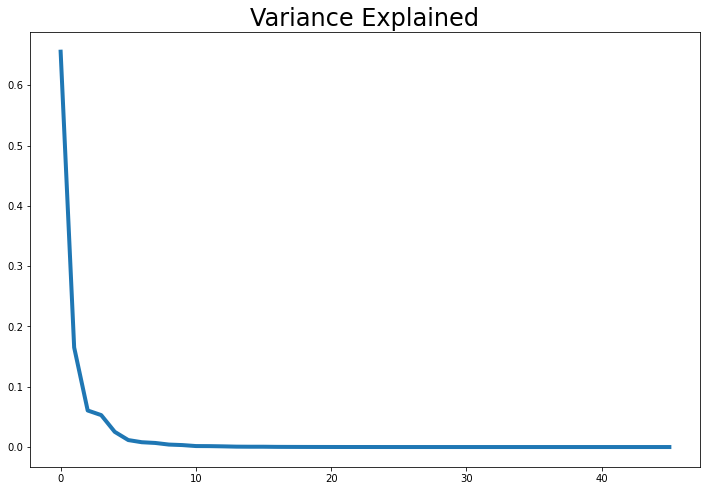

In [39]:
plt.figure(figsize=(12,8))

# Plot the explained variance.
plt.plot(range(len(var_exp)), var_exp, lw=4, label = 'Variance Explained')
plt.title('Variance Explained', fontsize=24);

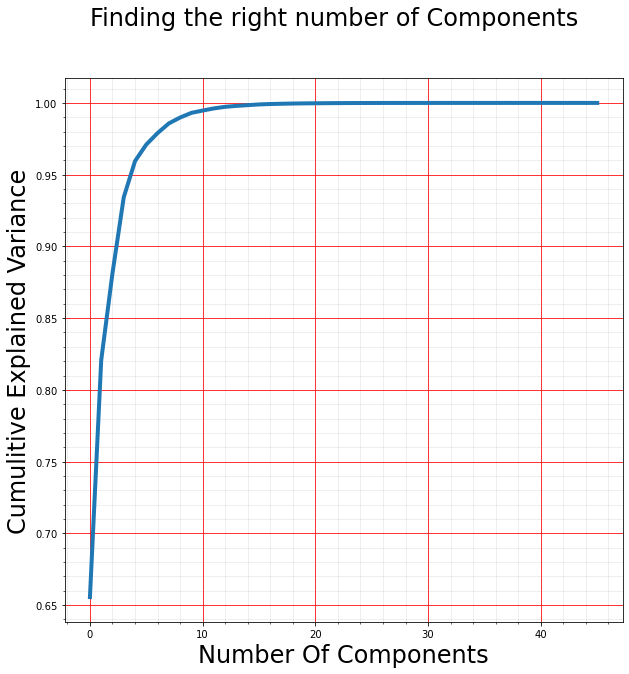

In [61]:
#Create the figure and axes objects
fig, ax = plt.subplots(1, figsize=(10, 10))
fig.suptitle('Finding the right number of Components', fontsize=24)

# Plot the data
ax.plot(cum_var_exp,lw=4)

# Show the grid lines as dark grey lines
plt.grid(b=True, which='both', color='r', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Number Of Components', fontsize=24)
plt.ylabel('Cumulitive Explained Variance', fontsize=24)

plt.show()